In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def rho(p, r):
    return (1 - p) *r +p * (1 - r)

def evidence_A(p, r, x=None):
    rh = rho(p, r)
    if x is None:
        return r*np.log(1 - rh) + (1 - r) * np.log(rh)
    if x==1:
        return np.log(1 - rh)
    if x==2:
        return np.log(rh)
    raise ValueError

def evidence_B(p, r, x=None):
    rh = rho(p, r)
    if x is None:
        return (1 - r)*np.log(1 - rh) + r * np.log(rh)
    if x==1:
        return np.log(rh)
    if x==2:
        return np.log(1 - rh)
    raise ValueError

def gain_A(p, r, x=None):
    rh = rho(p, r)
    gain_with_x1 = -np.log(1 - rh) + (p*r*np.log(r) + (1-p)*(1-r)*np.log(1-r)) / (1 - rh)
    gain_with_x2 = -np.log(rh) + (p*(1 - r)*np.log(1 - r) + (1-p)*r*np.log(r)) / rh
    if x is None:
        return r * gain_with_x1 + (1 - r) * gain_with_x2
    if x== 1:
        return gain_with_x1
    if x== 2:
        return gain_with_x2
    raise ValueError

def gain_B(p, r, x=None):
    rh = rho(p, r)
    gain_with_x1 = -np.log(rh) + (p*(1 - r)*np.log(1 - r) + (1-p)*r*np.log(r)) / rh
    gain_with_x2 = -np.log(1 - rh) + (p*r*np.log(r) + (1-p)*(1-r)*np.log(1-r)) / (1 - rh)
    if x is None:
        return r * gain_with_x1 + (1 - r) * gain_with_x2
    if x== 1:
        return gain_with_x1
    if x== 2:
        return gain_with_x2
    raise ValueError
    
def prior_A(p, r, x=None):
    rh = rho(p, r)
    prior_with_x1 = (p*r*np.log(p) + (1 - p)*(1-r)*np.log(1-p)) / (1 - rh)
    prior_with_x2 = ((1 - p)*r*np.log(1 - p) + p*(1-r)*np.log(p)) / rh
    if x is None:
        return r * prior_with_x1 + (1 - r) * prior_with_x2
    if x== 1:
        return prior_with_x1
    if x== 2:
        return prior_with_x2
    raise ValueError

def prior_B(p, r, x=None):
    rh = rho(p, r)
    prior_with_x1 = ((1 - p)*r*np.log(1 - p) + p*(1-r)*np.log(p)) / rh
    prior_with_x2 = (p*r*np.log(p) + (1 - p)*(1-r)*np.log(1-p)) / (1 - rh)
    if x is None:
        return r * prior_with_x1 + (1 - r) * prior_with_x2
    if x== 1:
        return prior_with_x1
    if x== 2:
        return prior_with_x2
    raise ValueError

def recon_A(p, r, x=None):
    return -gain_A(p, r, x=x) / prior_A(p, r, x=x)

def recon_B(p, r, x=None):
    return -gain_B(p, r, x=x) / prior_B(p, r, x=x)

def pred_A(p, r, x=None):
    return -gain_A(p, r, x=x) / evidence_A(p, r, x=x)

def pred_B(p, r, x=None):
    return -gain_B(p, r, x=x) / evidence_B(p, r, x=x)

def posterior_A(p, r, x=None):
    return prior_A(p, r, x=x) - gain_A(p, r, x=x)

def posterior_B(p, r, x=None):
    return prior_B(p, r, x=x) - gain_B(p, r, x=x)

def likelihood_A(p, r, x=None):
    return evidence_A(p, r, x=x) - gain_A(p, r, x=x)

def likelihood_B(p, r, x=None):
    return evidence_B(p, r, x=x) - gain_B(p, r, x=x)

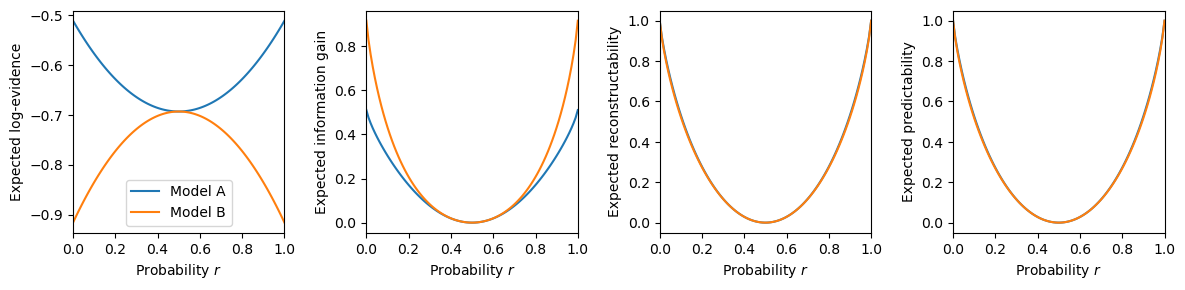

In [54]:
eps=1e-15
r = np.linspace(0+eps, 1-eps, 100)
p=0.6
x = None

i, N = 0, 4


fig, ax = plt.subplots(1, N, figsize=(3 * N, 3))
ax[i].plot(r, evidence_A(p, r, x), label="Model A")
ax[i].plot(r, evidence_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected log-evidence")
ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

i += 1
ax[i].plot(r, gain_A(p, r, x), label="Model A")
ax[i].plot(r, gain_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected information gain")
# ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

i += 1
ax[i].plot(r, recon_A(p, r, x), label="Model A")
ax[i].plot(r, recon_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected reconstructability")
# ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

i += 1
ax[i].plot(r, pred_A(p, r, x), label="Model A")
ax[i].plot(r, pred_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected predictability")
# ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

fig.tight_layout()


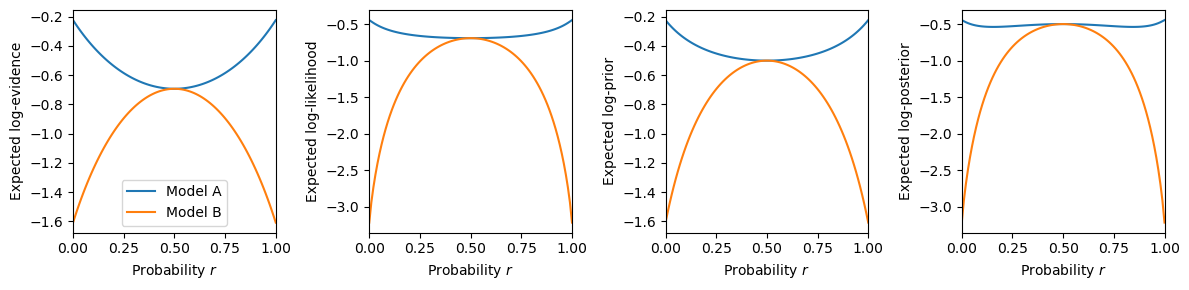

In [57]:
eps=1e-15
r = np.linspace(0+eps, 1-eps, 100)
p=0.8
x = None

i, N = 0, 4

fig, ax = plt.subplots(1, N, figsize=(3 * N, 3))
ax[i].plot(r, evidence_A(p, r, x), label="Model A")
ax[i].plot(r, evidence_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected log-evidence")
ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

i += 1
ax[i].plot(r, likelihood_A(p, r, x), label="Model A")
ax[i].plot(r, likelihood_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected log-likelihood")
# ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

i += 1
ax[i].plot(r, prior_A(p, r, x), label="Model A")
ax[i].plot(r, prior_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected log-prior")
# ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])

i += 1
ax[i].plot(r, posterior_A(p, r, x), label="Model A")
ax[i].plot(r, posterior_B(p, r, x), label="Model B")
ax[i].set_xlabel("Probability $r$")
ax[i].set_ylabel("Expected log-posterior")
# ax[i].legend(fontsize=10)
ax[i].set_xlim([0, 1])
fig.tight_layout()